<a href="https://colab.research.google.com/github/FGalvao77/Machine-Learning/blob/main/03_Introdu%C3%A7%C3%A3o_%C3%A0_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas necessárias
import pandas as pd                # para modelagem de dados
import numpy as np                 # para recursos matemáticos e matrizes
import matplotlib.pyplot as plt    # para gerar visualizações gráficas

# comando "mágico" para renderizar a visualização gráfica
%matplotlib inline

# para ignorar mensagens de erros
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# instanciado os dados da temperatura e número de sorvetes - valores fictícios
# utilizaremos a função do numpy para criar um array de vetores com os valores
temperatura = np.array([30, 25, 36, 18, 25, 29, 30, 33, 37, 31, 26, 37, 29, 26, 30, 31, 34, 38])
numero_sorvetes = np.array([20, 12, 50, 10, 18, 25, 26, 32, 48, 22, 16, 52, 24, 20, 28, 29, 35, 40])

In [21]:
# com dados instanciados nas variáveis, agora iremos transforma-los em um dataframe
# para isso, usaremos a função do pandas ".DataFrame" 
# e passando como argumento um dicionário com as variáveis "temperatura" e "numero_sorvetes"
df = pd.DataFrame({'temperatura': temperatura,
                   'num_sorvetes': numero_sorvetes})

# visualizando as 5 primeiras linhas do dataframe criado
df.head()

,temperatura,num_sorvetes
0,30,20
1,25,12
2,36,50
3,18,10
4,25,18


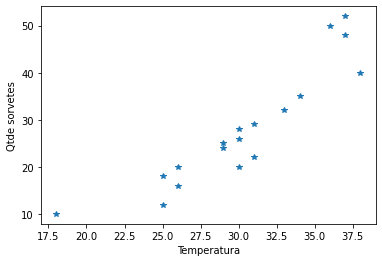

In [ ]:
# configurando a plotagem do gráfico
plt.plot(df['temperatura'],   # no eixo x os valores da coluna "temperatura"
         df['num_sorvetes'],  # no eixo y os valores de coluna "num_sorvetes"
         '*')                 # definindo o estilo do plot no gráfico
plt.xlabel('Temperatura')     # nome do eixo x
plt.ylabel('Qtde sorvetes')   # nome do eixo y
plt.show();

In [30]:
# instanciando na variável "X" os dados da coluna "temperatura"
# transformando em um conjunto de array do tipo float
# para isso, utilizaremos a função do numpy ".to_numpy"
X = df['temperatura'].to_numpy()
X # visualizando a variável

array([30, 25, 36, 18, 25, 29, 30, 33, 37, 31, 26, 37, 29, 26, 30, 31, 34,
       38])

In [ ]:
# instanciando na variável "y" os dados da coluna "num_sorvetes"
# transformando em um conjunto de array do tipo float
# para isso, utilizaremos a função do numpy ".to_numpy"
y = df['num_sorvetes'].to_numpy()
y # visualizando a variável

array([20, 12, 50, 10, 18, 25, 26, 32, 48, 22, 16, 52, 24, 20, 28, 29, 35,
       40])

In [ ]:
# importando a biblioteca para realizar a separação do dados de treino e teste
# utilizando a função "train_test_split" da biblioteca do sklearn.model_selection
from sklearn.model_selection import train_test_split

In [ ]:
# separando os dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size = 0.2)

In [ ]:
# importando a função para realizar a regressão
# utilizaremos a função "LinearRegression" do sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
# instanciando a função "LinearRegression()" na variável "modelo"
modelo = LinearRegression()

In [ ]:
# treinando o modelo com os dados de treino - X_treino e y_treino
# utilizaremos a função ".fit()" e como argumentos os dados de treino
# para cada variável de treino, utilizaremos a função ".reshape()"
# e dentro da função, passaremos como argumento "(-1, 1)" 
# irar transformar (escalar) os dados entre -1 e 1
modelo.fit(X_treino.reshape(-1, 1),
           y_treino.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# realizando a previsão com os dados do "X_teste" 
# com a função ".predict()" e "reshape(-1, 1)"
# e o resultado instanciando na variável "y_previsto"
y_previsto = modelo.predict(X_teste.reshape(-1, 1))

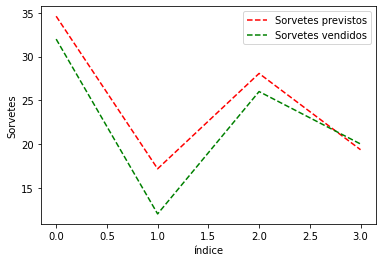

In [25]:
# plotando o gráfico com os dados
plt.plot(range(y_previsto.shape[0]),  # utilizando a função "range" e como argumento o "y_previsto.shape[0]"
         y_previsto, 'r--')           # e definindo o estilo e a cor do plot no gráfico "r--" ("r" de red e linha tracejada)
plt.plot(range(y_teste.shape[0]),     # utilizando a função "range" e como argumento o "y_teste.shape[0]"
         y_teste, 'g--')              # e definindo o estilo e a cor do plot no gráfico "g--" ("g" de green e linha tracejada)

# plotando as legendas
plt.legend(['Sorvetes previstos',     
            'Sorvetes vendidos'])
plt.xlabel('índice')    # nome do eixo x                 
plt.ylabel('Sorvetes')  # nome do eixo y
plt.show();